In [1]:
# Import Dependencies
import math
import tqdm
import tqdm.auto
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
tqdm.tqdm = tqdm.auto.tqdm
%matplotlib inline

In [2]:
# Check TF Version
tf.__version__

'1.12.0'

In [3]:
# Download and Extract Dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 2s 0us/step


In [4]:
len(x_train), len(y_train)

(25000, 25000)

In [5]:
len(x_test), len(y_test)

(25000, 25000)

In [6]:
# Convert Integers to Words
# A dictionary mapping words to an integer index
word_index = tf.keras.datasets.imdb.get_word_index()

1646592/1641221 [==============================] - 0s 0us/step


In [7]:
word_index

{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

In [8]:
# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()} 
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [9]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

In [10]:
reverse_word_index

{34704: 'fawn',
 52009: 'tsukino',
 52010: 'nunnery',
 16819: 'sonja',
 63954: 'vani',
 1411: 'woods',
 16118: 'spiders',
 2348: 'hanging',
 2292: 'woody',
 52011: 'trawling',
 52012: "hold's",
 11310: 'comically',
 40833: 'localized',
 30571: 'disobeying',
 52013: "'royale",
 40834: "harpo's",
 52014: 'canet',
 19316: 'aileen',
 52015: 'acurately',
 52016: "diplomat's",
 25245: 'rickman',
 6749: 'arranged',
 52017: 'rumbustious',
 52018: 'familiarness',
 52019: "spider'",
 68807: 'hahahah',
 52020: "wood'",
 40836: 'transvestism',
 34705: "hangin'",
 2341: 'bringing',
 40837: 'seamier',
 34706: 'wooded',
 52021: 'bravora',
 16820: 'grueling',
 1639: 'wooden',
 16821: 'wednesday',
 52022: "'prix",
 34707: 'altagracia',
 52023: 'circuitry',
 11588: 'crotch',
 57769: 'busybody',
 52024: "tart'n'tangy",
 14132: 'burgade',
 52026: 'thrace',
 11041: "tom's",
 52028: 'snuggles',
 29117: 'francesco',
 52030: 'complainers',
 52128: 'templarios',
 40838: '272',
 52031: '273',
 52133: 'zaniacs',

In [11]:
# Decode a Sample Review
sample_review = x_train[0]
review_string = ' '

for i in sample_review:
  review_string += reverse_word_index[i] + " "

print(review_string)

 <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

In [12]:
# Function to Decode Reviews
def decodeReview(review=None):
  return ' '.join([reverse_word_index.get(i, '?') for i in review])

In [13]:
# Pad Sequences
train_data = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [14]:
len(train_data[0])

256

In [15]:
# Build the Model
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

layer_1 = tf.keras.layers.Embedding(vocab_size, 16)
layer_2 = tf.keras.layers.GlobalAveragePooling1D()
layer_3 = tf.keras.layers.Dense(16, activation="relu")
layer_4 = tf.keras.layers.Dense(1, activation="sigmoid")
model = tf.keras.Sequential([layer_1, layer_2, layer_3, layer_4])

In [16]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [18]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [19]:
# Train the Model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

/Users/anujdutt/miniconda3/envs/deeplearning/lib/python3.6/site-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 41us/step - loss: 0.6921 - acc: 0.5747 - val_loss: 0.6905 - val_acc: 0.6541
Epoch 2/40
15000/15000 [==============================] - 0s 17us/step - loss: 0.6871 - acc: 0.7112 - val_loss: 0.6832 - val_acc: 0.7330
Epoch 3/40
15000/15000 [==============================] - 0s 17us/step - loss: 0.6755 - acc: 0.7515 - val_loss: 0.6681 - val_acc: 0.7510
Epoch 4/40
15000/15000 [==============================] - 0s 17us/step - loss: 0.6535 - acc: 0.7636 - val_loss: 0.6431 - val_acc: 0.7579
Epoch 5/40
15000/15000 [==============================] - 0s 16us/step - loss: 0.6199 - acc: 0.7871 - val_loss: 0.6065 - val_acc: 0.7792
Epoch 6/40
15000/15000 [==============================] - 0s 17us/step - loss: 0.5764 - acc: 0.8065 - val_loss: 0.5642 - val_acc: 0.7964
Epoch 7/40
15000/15000 [==============================] - 0s 17us/step - loss: 0.5276 - acc: 0.8257 - val_loss: 0.5195 - val_acc

In [20]:
results = model.evaluate(test_data, y_test)

print(results)

25000/25000 [==============================] - 0s 12us/step
[0.3314090662384033, 0.87248]


In [21]:
model.save("saved_model.h5")

In [22]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

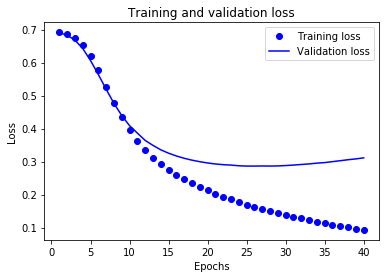

In [23]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()